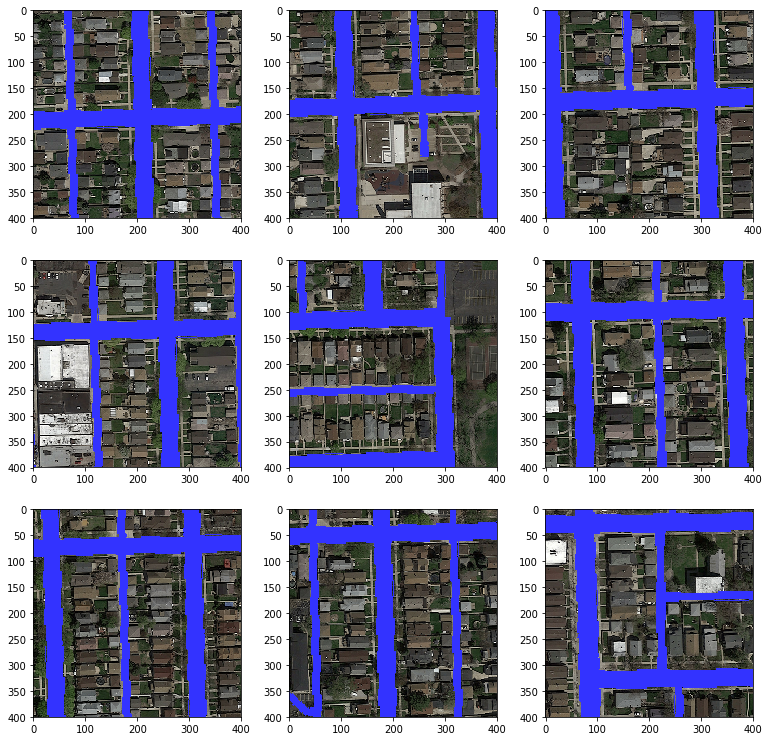

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img={};
masks = {};

r_set = []
g_set = []
b_set = []


for i in range(1,10):
    img[i-1]=mpimg.imread('training/images/satImage_00'+str(i)+'.png')
    masks[i-1]=mpimg.imread('training/groundtruth/satImage_00'+str(i)+'.png')
    
    r_set = np.concatenate( (r_set, (np.array(img[i-1][:,:,0][masks[i-1] >0.0]).squeeze())), axis=0)
    g_set = np.concatenate( (g_set, (np.array(img[i-1][:,:,1][masks[i-1] >0.0]).squeeze())), axis=0)
    b_set = np.concatenate( (b_set, (np.array(img[i-1][:,:,2][masks[i-1] >0.0]).squeeze())), axis=0)
    
    img[i-1][:,:,0][masks[i-1] >0.0]=0.2
    img[i-1][:,:,1][masks[i-1] >0.0]=0.2
    img[i-1][:,:,2][masks[i-1] >0.0]=1.0

plt.rcParams['figure.figsize'] = (13,13)
for i in range(0,3):
    for j in range(0,3):
        plt.subplot(3,3,3*i+j+1)
        plt.imshow(img[3*i+j])
plt.show()

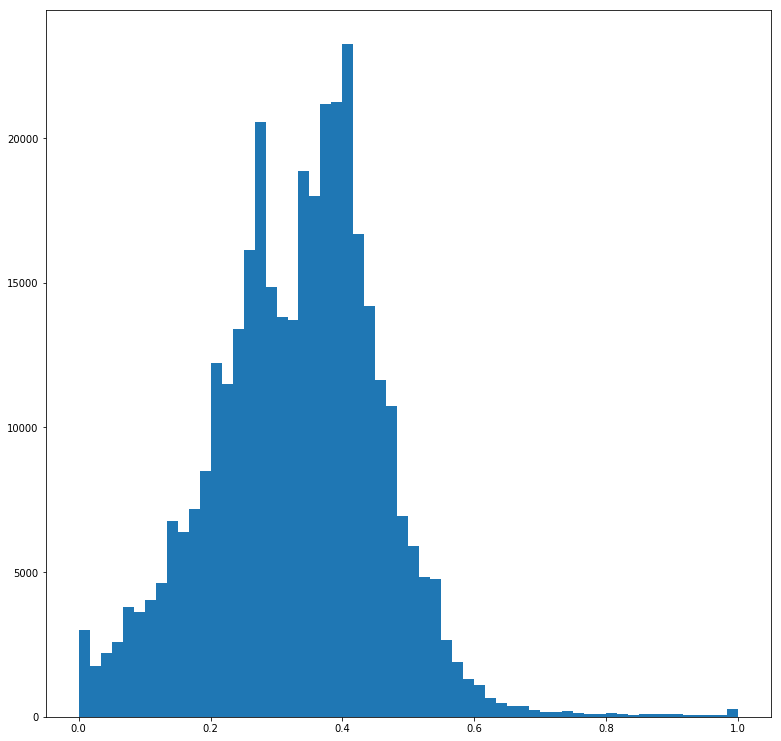

In [16]:
plt.hist(g_set, bins=60) # 0.1<r<0.6, 0.1<g<0.6, 0<b<0.5
plt.show()

In [47]:
np.shape(masks[0])

(400, 400)

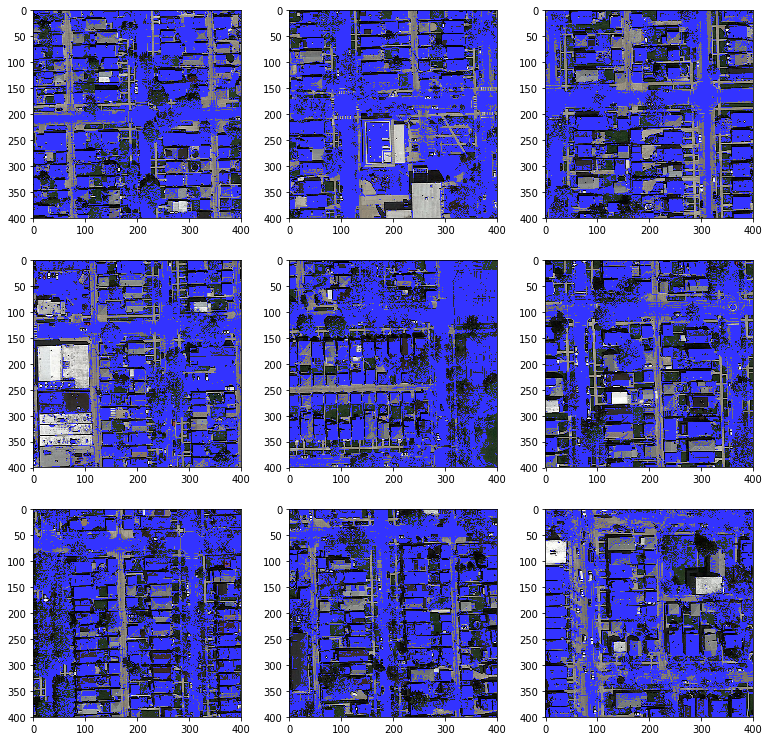

In [17]:
for i in range(1,10):
    img[i-1]=mpimg.imread('training/images/satImage_00'+str(i)+'.png')
    masks[i-1]=mpimg.imread('training/groundtruth/satImage_00'+str(i)+'.png')
    
    idxs = ( img[i-1][:,:,0] >0.2 ) & (img[i-1][:,:,0] <0.5)
    idxs = idxs & (img[i-1][:,:,1] >0.2) &(img[i-1][:,:,1] <0.5)
    idxs = idxs & (img[i-1][:,:,2] >0.1  ) & (img[i-1][:,:,2] <0.4)
    
    img[i-1][:,:,0][idxs]=0.2
    img[i-1][:,:,1][idxs]=0.2
    img[i-1][:,:,2][idxs]=1.0

plt.rcParams['figure.figsize'] = (13,13)
for i in range(0,3):
    for j in range(0,3):
        plt.subplot(3,3,3*i+j+1)
        plt.imshow(img[3*i+j])
plt.show()